In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

In [45]:
df = pd.read_csv('smartphone_cleaned_v2.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            821 non-null    object 
 1   model                 821 non-null    object 
 2   price                 821 non-null    int64  
 3   rating                752 non-null    float64
 4   has_5G                821 non-null    bool   
 5   has_NFC               821 non-null    bool   
 6   has_IR_Blaster        821 non-null    bool   
 7   processor_name        795 non-null    object 
 8   processor_brand       795 non-null    object 
 9   num_cores             819 non-null    object 
 10  processor_speed       812 non-null    float64
 11  battery_capacity      817 non-null    float64
 12  fast_charging         821 non-null    float64
 13  ram_capacity          821 non-null    float64
 14  internal_memory       821 non-null    int64  
 15  screen_size           8

In [8]:
df['extended_memory'].astype("int")

ValueError: invalid literal for int() with base 10: '1\u2009TB'

In [7]:
df['extended_memory']=df['extended_memory'].str.replace('1TB','1024')

In [46]:
df["extended_memory"].value_counts()

1 TB                    252
0                       229
512 GB                  119
256 GB                  113
Not Specified            52
128 GB                   23
Memory Card (Hybrid)     17
2 TB                      9
64 GB                     5
32 GB                     2
Name: extended_memory, dtype: int64

In [47]:
def extended_memory_avl(text):
    if "TB" in text:
        return 1
    elif "GB" in text:
        return 1
    else:
        return 0

In [48]:
df['extended_memory_avl']=df["extended_memory"].apply(extended_memory_avl)

In [49]:
# Extract the extended memory information from the "extended_memory" column.
# Clean and format the data to remove special characters and spaces.
# Store the extracted data in the "extended_upto" column.
df["extended_upto"]=df["extended_memory"].str.strip().str.replace('\u2009',' ').str.split(' ').str.get(0)

In [50]:
df['extended_upto'].value_counts()


1         252
0         229
512       119
256       113
Not        52
128        23
Memory     17
2           9
64          5
32          2
Name: extended_upto, dtype: int64

In [23]:
df['extended_upto']=df[df['extended_upto']=='2']['extended_upto'].str.replace('2','2048')

In [25]:
df

,brand_name,model,price,rating,has_5G,has_NFC,has_IR_Blaster,processor_name,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,resolution,refresh_rate,num_rear_camera,num_front_cam,os,primary_camera_rear,primary_camera_front,extended_memory,extended_memory_avl,extended_upto
0,oneplus,OnePlus Nord CE 3 Lite 5G,19999,85.0,True,False,False,Snapdragon 695 5G,snapdragon,Octa Core,2.2,5000.0,67.0,8.0,128,6.72,1080 x 2400,120,3,1,android,108.0,16.0,1 TB,1,NaN
1,oppo,OPPO Reno 10,32999,88.0,True,True,True,Dimensity 7050,dimensity,Octa Core,2.6,5000.0,67.0,8.0,256,6.70,1080 x 2412,120,3,1,android,64.0,32.0,Memory Card (Hybrid),0,NaN
2,oppo,OPPO Reno 10 Pro,39999,87.0,True,True,True,Snapdragon 778G,snapdragon,Octa Core,2.4,4600.0,80.0,12.0,256,6.70,1080 x 2412,120,3,1,android,50.0,32.0,0,0,NaN
3,vivo,Vivo T2x 5G (6GB RAM + 128GB),13999,78.0,True,False,False,Dimensity 6020,dimensity,Octa Core,2.2,5000.0,18.0,6.0,128,6.58,1080 x 2408,60,2,1,android,50.0,8.0,1 TB,1,NaN
4,realme,Realme Narzo 60 5G,17999,82.0,True,False,False,Dimensity 6020,dimensity,Octa Core,2.2,5000.0,33.0,8.0,128,6.43,1080 x 2400,90,2,1,android,64.0,16.0,1 TB,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,ikall,iKall K470 Plus,6299,NaN,False,False,False,NaN,NaN,Quad Core,1.3,4000.0,-1.0,4.0,64,6.25,720 x 1520,60,1,1,android,13.0,8.0,128 GB,1,NaN
817,ikall,iKall K470 New (4GB RAM + 64GB),6299,NaN,False,False,False,NaN,NaN,Quad Core,1.3,4000.0,-1.0,4.0,64,6.26,720 x 1520,60,1,1,android,13.0,8.0,128 GB,1,NaN
818,nokia,Nokia C12 Pro (3GB RAM + 64GB),7480,NaN,False,False,False,Unisoc SC9863A1,unisoc,Octa Core,1.6,4000.0,-1.0,3.0,64,6.30,720 x 1600,60,1,1,android,8.0,5.0,Not Specified,0,NaN
819,ikall,iKall Z19 (4GB RAM + 64GB),7799,60.0,False,False,False,NaN,NaN,Quad Core,1.6,5000.0,-1.0,4.0,64,6.50,720 x 1600,60,1,1,android,13.0,8.0,128 GB,1,NaN


In [29]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'extended_memory' is the column containing memory values
df['extended_memory'] = pd.to_numeric(df['extended_memory'], errors='coerce')  # Convert non-numeric values to NaN
df['extended_memory'] = df['extended_memory'].fillna(0)  # Fill missing values with 0 (or any other value)

# Convert TB to GB for numeric entries
df['extended_memory'] = df['extended_memory'].apply(lambda x: x * 1024 if x >= 1 else x)

# Optional: Round the values to a desired decimal place
df['extended_memory'] = df['extended_memory'].round(2)


In [66]:
df.drop(columns='extended_memory',inplace=True)

In [32]:


# Assuming 'df' is your DataFrame and 'extended_upto' is the column containing memory values
df['extended_upto'] = pd.to_numeric(df['extended_upto'], errors='coerce')  # Convert non-numeric values to NaN
df['extended_upto'] = df['extended_upto'].fillna(0)  # Fill missing values with 0 (or any other value)

# Convert TB to GB for numeric entries
df['extended_upto'] = df['extended_upto'].apply(lambda x: x * 1024 if x >= 1 else x)

# Optional: Round the values to a desired decimal place
df['extended_upto'] = df['extended_upto'].round(2)


In [70]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5G', 'has_NFC',
       'has_IR_Blaster', 'processor_name', 'processor_brand', 'num_cores',
       'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'resolution', 'refresh_rate',
       'num_rear_camera', 'num_front_cam', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_avl', 'extended_upto'],
      dtype='object')

In [43]:
df['extended_upto']=df[df['']=='2']['extended_upto'].str.replace('2','2048')

In [61]:
temp_df=df[df['extended_upto']=="2"]['extended_upto']

In [59]:
df.loc[temp_df.index,'extended_upto']='1024'

In [65]:
df['extended_upto'].value_counts()

1024    252
0       229
512     119
256     113
128      23
2048      9
64        5
32        2
Name: extended_upto, dtype: int64

In [62]:
df.loc[temp_df.index,'extended_upto']='2048'

In [64]:
df['extended_upto'] = df['extended_upto'].replace(['Memory', 'Not'], np.nan)

In [69]:
df['num_cores'].value_counts()

8.0    735
4.0     46
6.0     37
2.0      1
Name: num_cores, dtype: int64

In [68]:
# Assuming 'df' is your DataFrame and 'num_cores' is the column containing core values
core_mapping = {
    'Octa Core': 8,
    'Quad Core': 4,
    'Hexa Core': 6,
    'Dual Core': 2
}

df['num_cores'] = df['num_cores'].map(core_mapping)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            821 non-null    object 
 1   model                 821 non-null    object 
 2   price                 821 non-null    int64  
 3   rating                752 non-null    float64
 4   has_5G                821 non-null    bool   
 5   has_NFC               821 non-null    bool   
 6   has_IR_Blaster        821 non-null    bool   
 7   processor_name        795 non-null    object 
 8   processor_brand       795 non-null    object 
 9   num_cores             819 non-null    float64
 10  processor_speed       812 non-null    float64
 11  battery_capacity      817 non-null    float64
 12  fast_charging         821 non-null    float64
 13  ram_capacity          821 non-null    float64
 14  internal_memory       821 non-null    int64  
 15  screen_size           8

In [11]:
df['fast_charging']=df["fast_charging"].astype("string")

In [78]:
df["fast_charging"].value_counts()

-1.0      152
 33.0     123
 18.0     122
 25.0      62
 0.0       55
 10.0      47
 15.0      41
 67.0      36
 30.0      26
 44.0      25
 120.0     24
 65.0      20
 80.0      19
 45.0      17
 66.0      14
 20.0      11
 100.0      8
 50.0       4
 27.0       3
 22.5       2
 150.0      2
 125.0      2
 60.0       2
 21.0       1
 180.0      1
 68.0       1
 19.0       1
Name: fast_charging, dtype: int64

In [84]:
def fast_charging_available(value):
    if value == '-1.0' or value == '0.0':
        return 
    else:
        return 1


In [86]:
fast_charging_avl=df["fast_charging"].apply(fast_charging_available)

In [88]:
df.insert(12,"fast_charging_avl",fast_charging_avl)

In [90]:
df.drop(columns='processor_name',inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            821 non-null    object 
 1   model                 821 non-null    object 
 2   price                 821 non-null    int64  
 3   rating                752 non-null    float64
 4   has_5G                821 non-null    bool   
 5   has_NFC               821 non-null    bool   
 6   has_IR_Blaster        821 non-null    bool   
 7   processor_brand       795 non-null    object 
 8   num_cores             819 non-null    float64
 9   processor_speed       812 non-null    float64
 10  battery_capacity      817 non-null    float64
 11  fast_charging_avl     821 non-null    int64  
 12  fast_charging         821 non-null    float64
 13  ram_capacity          821 non-null    float64
 14  internal_memory       821 non-null    int64  
 15  screen_size           8

In [92]:
df.to_csv("fina_sheet_v2.csv")

In [2]:
df=pd.read_csv("fina_sheet_v2.csv")

In [4]:
df['processor_brand']=df['processor_brand'].replace("a13","bionic")

In [12]:
df[df['fast_charging']=='-1.0'].

,Unnamed: 0,brand_name,model,price,rating,has_5G,has_NFC,has_IR_Blaster,processor_brand,num_cores,...,screen_size,resolution,refresh_rate,num_rear_camera,num_front_cam,os,primary_camera_rear,primary_camera_front,extended_memory_avl,extended_upto
48,48,xiaomi,Xiaomi Redmi 12C,8499,70.0,False,False,False,helio,8.0,...,6.71,720 x 1650,60,2,1,android,50.0,5.0,1,1024.0
89,89,apple,Apple iPhone 11,40999,73.0,False,True,False,bionic,6.0,...,6.10,828 x 1792,60,2,1,ios,12.0,12.0,0,0.0
132,132,apple,Apple iPhone 12,53999,74.0,True,True,False,bionic,6.0,...,6.10,1170 x 2532,60,2,1,ios,12.0,12.0,0,0.0
137,137,motorola,Motorola Moto G51 5G,14107,77.0,True,True,False,snapdragon,8.0,...,6.80,1080 x 2400,120,3,1,android,50.0,13.0,1,512.0
144,144,xiaomi,Xiaomi Redmi 12C (6GB RAM + 128GB),10452,74.0,False,False,False,helio,8.0,...,6.71,720 x 1650,60,2,1,android,50.0,5.0,1,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,816,ikall,iKall K470 Plus,6299,NaN,False,False,False,NaN,4.0,...,6.25,720 x 1520,60,1,1,android,13.0,8.0,1,128.0
817,817,ikall,iKall K470 New (4GB RAM + 64GB),6299,NaN,False,False,False,NaN,4.0,...,6.26,720 x 1520,60,1,1,android,13.0,8.0,1,128.0
818,818,nokia,Nokia C12 Pro (3GB RAM + 64GB),7480,NaN,False,False,False,unisoc,8.0,...,6.30,720 x 1600,60,1,1,android,8.0,5.0,0,NaN
819,819,ikall,iKall Z19 (4GB RAM + 64GB),7799,60.0,False,False,False,NaN,4.0,...,6.50,720 x 1600,60,1,1,android,13.0,8.0,1,128.0


In [19]:
df['fast_charging']=df['fast_charging'].replace('0.0',np.nan)

In [20]:
df['fast_charging'].value_counts()

33.0     123
18.0     122
25.0      62
10.0      47
15.0      41
67.0      36
30.0      26
44.0      25
120.0     24
65.0      20
80.0      19
45.0      17
66.0      14
20.0      11
100.0      8
50.0       4
27.0       3
125.0      2
60.0       2
150.0      2
22.5       2
68.0       1
180.0      1
21.0       1
19.0       1
Name: fast_charging, dtype: Int64

In [21]:
df.isnull().sum()

Unnamed: 0                0
brand_name                0
model                     0
price                     0
rating                   69
has_5G                    0
has_NFC                   0
has_IR_Blaster            0
processor_brand          26
num_cores                 2
processor_speed           9
battery_capacity          4
fast_charging_avl         0
fast_charging           207
ram_capacity              0
internal_memory           0
screen_size               0
resolution                0
refresh_rate              0
num_rear_camera           0
num_front_cam             0
os                       10
primary_camera_rear       0
primary_camera_front      0
extended_memory_avl       0
extended_upto            69
dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

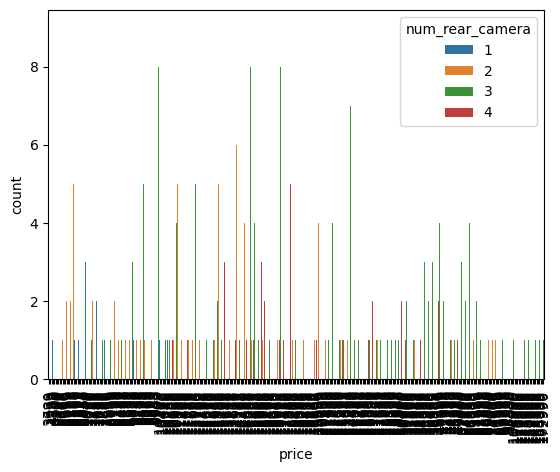

In [49]:
sns.countplot(data=temp_df,x='price',hue='num_rear_camera')
plt.xticks(rotation='vertical')

In [50]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px

In [5]:
df=pd.read_csv("fina_sheet_v2.csv")